# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


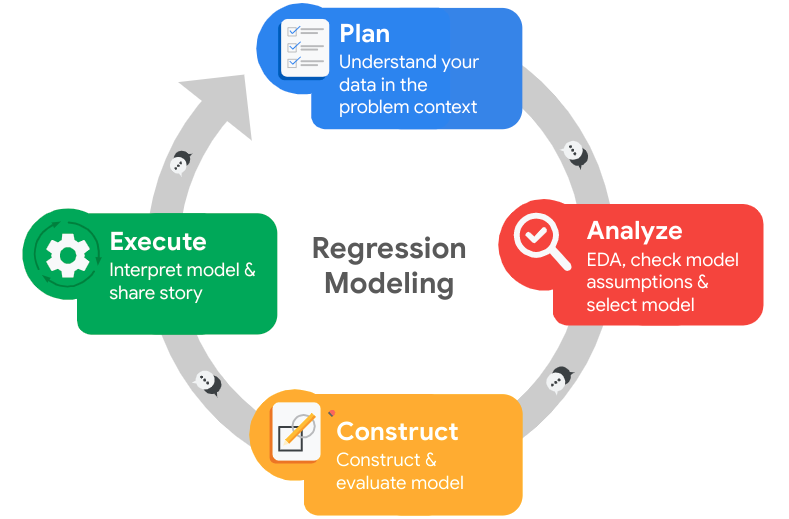

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [65]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import numpy as np

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [69]:
# Rename columns as needed
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours',
               'tenure', 'work_accident', 'left', 'promotion_last_5years',
               'department', 'salary']
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [27]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [28]:
# Check for duplicates
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [29]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [30]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

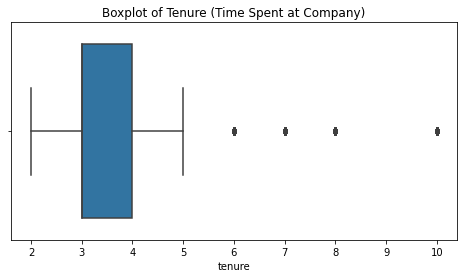

In [32]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['tenure'])
plt.title("Boxplot of Tenure (Time Spent at Company)")
plt.show()

In [33]:
# Determine the number of rows containing outliers
outliers = df[df['tenure'] > 6]
print("Number of outliers in tenure:", len(outliers))

Number of outliers in tenure: 282


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [22]:
# Get numbers of people who left vs. stayed
print("Left vs Stayed (Counts):")
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print("Left vs Stayed (%):")
print(df['left'].value_counts(normalize=True) * 100)

Left vs Stayed (Counts):
0    10000
1     1991
Name: left, dtype: int64
Left vs Stayed (%):
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

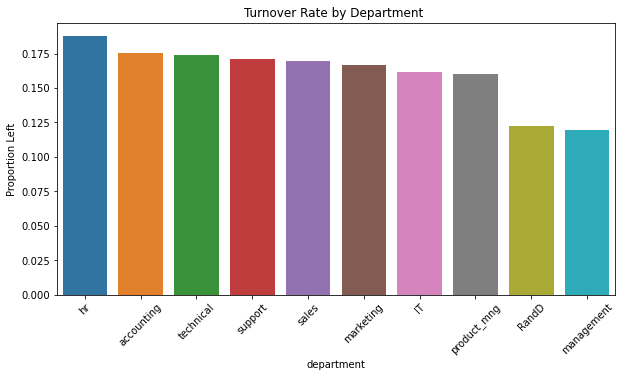

In [70]:
# Create a plot as needed
dept_turnover = df.groupby('department')['left'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='department', y='left', data=dept_turnover)
plt.xticks(rotation=45)
plt.title("Turnover Rate by Department ")
plt.ylabel("Proportion Left")
plt.show()

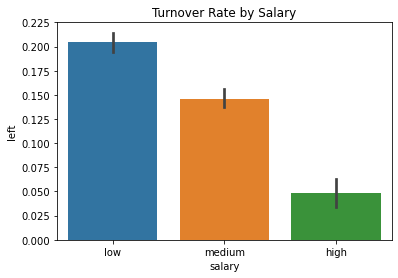

In [24]:
# Create a plot as needed
plt.figure(figsize=(6, 4))
sns.barplot(x='salary', y='left', data=df, order=['low', 'medium', 'high'])
plt.title("Turnover Rate by Salary")
plt.show()

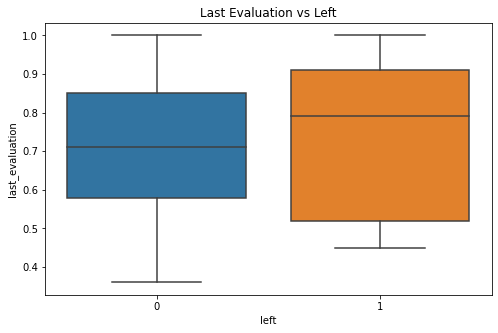

In [25]:
# Create a plot as needed
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='last_evaluation', data=df)
plt.title("Last Evaluation vs Left")
plt.show()

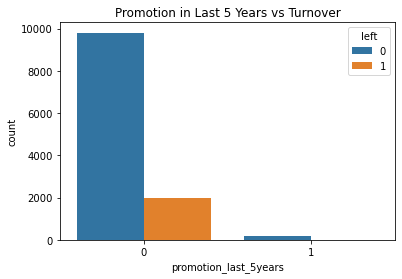

In [50]:
# Create a plot as needed
sns.countplot(data=df, x='promotion_last_5years', hue='left')
plt.title('Promotion in Last 5 Years vs Turnover')
plt.show()

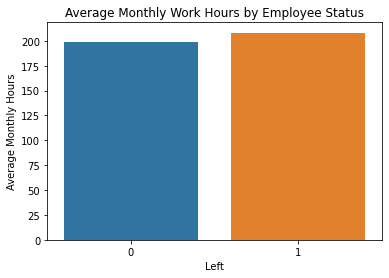

In [45]:
# Create a plot as needed
sns.barplot(x='left', y='average_monthly_hours', data=df, estimator=np.mean, ci=None)

plt.title("Average Monthly Work Hours by Employee Status")
plt.xlabel("Left")
plt.ylabel("Average Monthly Hours")
plt.show()

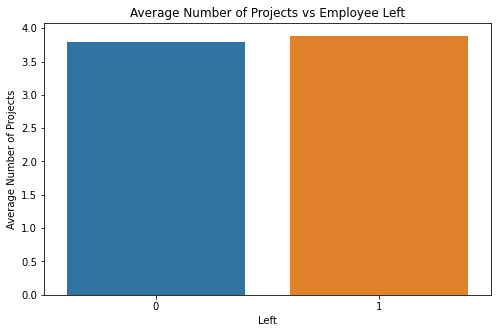

In [43]:
# Create a plot as needed
plt.figure(figsize=(8, 5))
sns.barplot(x='left', y='number_project', data=df, estimator=np.mean, ci=None)
plt.title("Average Number of Projects vs Employee Left")
plt.xlabel("Left")
plt.ylabel("Average Number of Projects")
plt.show()

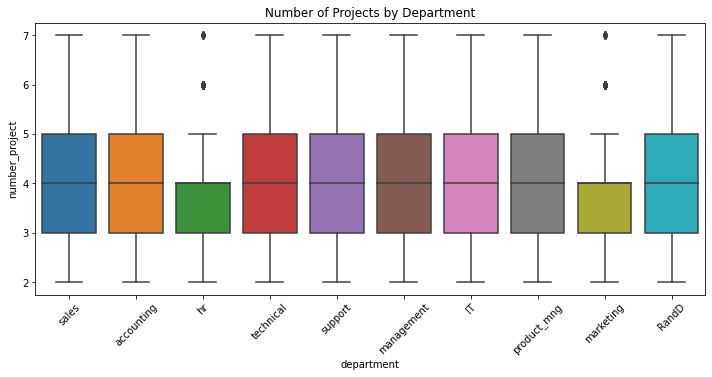

In [49]:
# Create a plot as needed
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='department', y='number_project')
plt.xticks(rotation=45)
plt.title('Number of Projects by Department')
plt.show()

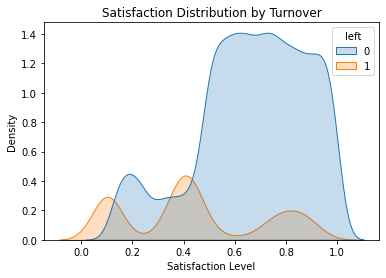

In [51]:
# Create a plot as needed
sns.kdeplot(data=df, x='satisfaction_level', hue='left', fill=True)
plt.title('Satisfaction Distribution by Turnover')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.show()

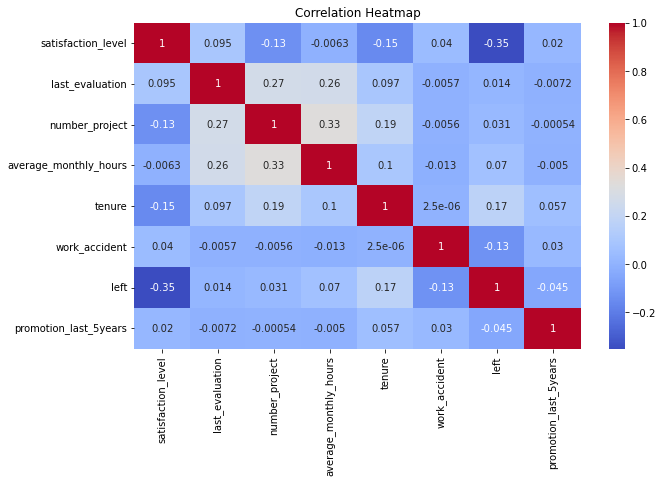

In [47]:
# Create a plot as needed
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Insights

The visualizations provided several important insights into employee turnover at Salifort Motors:

The highest turnover rate is observed in the Human Resources department, followed by Sales and Technical and the Management department has the lowest turnover rate, suggesting stronger retention in leadership roles.

Employees with low salaries are significantly more likely to leave the company, while those with high salaries tend to stay highlighting compensation as a key factor in employee retention.

Notably, none of the employees who received a promotion in the last five years left the company, whereas a large number of those who did not receive promotions did leave suggesting that opportunities for career growth are highly influential in retention.

The average monthly work hours and number of projects show only slight differences between employees who stayed and those who left, indicating that workload alone is not a strong predictor of turnover.

A large proportion of employees who remained with the company reported medium to high satisfaction levels, while those who left had noticeably lower satisfaction levelst his implies that job satisfaction is one of the most important predictors of employee retention.

Overall, salary, promotion history, and satisfaction level appear to be the most influential factors affecting whether an employee stays or leaves the company.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.


This is a binary classification task, where the goal is to predict whether an employee will leave the company (left = 1) or stay (left = 0) the target variable is categorical with two possible outcomes, classification models are most appropriate for this analysis.

### Identify the types of models most appropriate for this task.


Given the classification nature of the task we will use two models:

Random Forest: A robust ensemble model that reduces overfitting and provides good accuracy.

Logistic Regression: A traditional statistical model known for its interpretability and ability to highlight the influence of individual features on employee turnover. It serves as a strong baseline for binary classification problems.

These models were chosen to allow a comparison between interpretability and predictive power. The final recommendation will be based on evaluating their performance using key metrics such as F1-score and ROC AUC, ensuring the best possible balance between accuracy and actionable insights

### Modeling

Add as many cells as you need to conduct the modeling process.

In [52]:
### YOUR CODE HERE ###
# Encode salary and department
le_salary = LabelEncoder()
df['salary_encoded'] = le_salary.fit_transform(df['salary'])

le_dept = LabelEncoder()
df['department_encoded'] = le_dept.fit_transform(df['department'])

In [54]:
# Select features and target
features = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_monthly_hours', 'tenure', 'work_accident',
            'promotion_last_5years', 'salary_encoded', 'department_encoded']
X = df[features]
y = df['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [66]:
# --- Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders




## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders





--- Random Forest Results ---


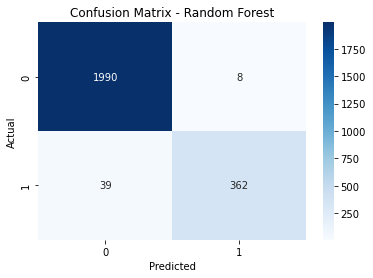

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

ROC AUC Score: 0.9768640211283603


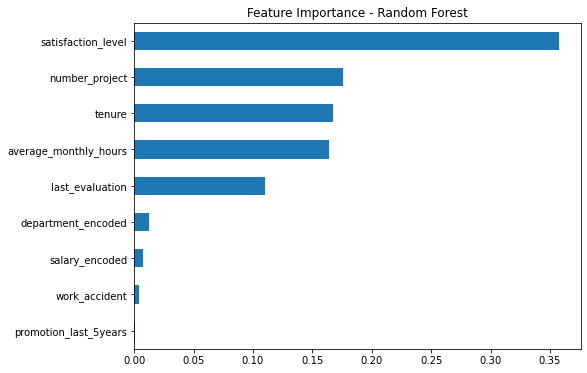

In [63]:
print("\n--- Random Forest Results ---")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Feature Importance - Random Forest
importances_rf = pd.Series(rf_model.feature_importances_, index=features)
importances_rf.sort_values().plot(kind='barh', figsize=(8, 6), title="Feature Importance - Random Forest")
plt.show()


--- Logistic Regression Results ---


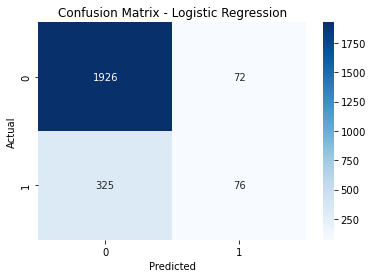

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1998
           1       0.51      0.19      0.28       401

    accuracy                           0.83      2399
   macro avg       0.68      0.58      0.59      2399
weighted avg       0.80      0.83      0.80      2399

ROC AUC Score: 0.8310130579457263


In [67]:
print("\n--- Logistic Regression Results ---")
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

### Summary of model results

The Random Forest model significantly outperformed Logistic Regression, achieving strong overall performance metrics:
Accuracy: 98%
Precision (Stayed vs. Left): 98% and 98%
Recall (Stayed vs. Left): 100% and 90%
F1-score: 0.99 for employees who stayed, and 0.94 for those who left
ROC AUC Score: 0.977

Feature importance analysis from the Random Forest model showed that the top five predictors of employee turnover are:
-Satisfaction level
-Number of projects
-Time spent at the company (tenure)
-Average monthly working hours
-Last evaluation score

On the other hand, the Logistic Regression model produced significantly weaker results:
Accuracy: 83%
Precision: 86% for stayed, but only 51% for left
Recall: 96% for stayed, but only 19% for left
F1-score: 0.91 (stayed), 0.28 (left)
ROC AUC Score: 0.831

While Logistic Regression provides interpretability, its low recall for predicting employees who left the company limits its usefulness in this context, the Random Forest model is recommended as the final model due to its superior predictive performance and better handling of class imbalance.

### Conclusion, Recommendations, Next Steps

At the end this analysis revealed key insights into the factors influencing employee turnover at Salifort Motors among the two models tested—Random Forest and Logistic Regression the Random Forest model demonstrated the highest predictive accuracy and was able to identify important features that influence employee decisions to leave the company the most influential variables included employee satisfaction level, number of projects, tenure, average monthly working hours, and last evaluation score.

Recommendations:

1. Improve job satisfaction: Since low satisfaction strongly correlates with turnover, focus on regular feedback, recognition programs, and career development opportunities.
2. Monitor workload and project allocation: Employees with extremely high or low project counts and working hours are more likely to leave and maintain a balanced workload across departments.
3. Targeted retention efforts by department: Departments such as HR, sales, and technical had the highest turnover rates these areas may benefit from management coaching, team-building efforts, or culture assessments.
4. Offer more competitive compensation: Employees with low salaries showed significantly higher turnover consider adjusting salary structures to improve retention.
5. Encourage promotions and growth opportunities: Employees who received promotions in the last five years were significantly more likely to stay.

Next Steps:
- Share the Random Forest model insights with HR and department heads to design targeted interventions.
- Conduct follow-up qualitative surveys or exit interviews to validate the identified factors and gather more context.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.